

# Project: TMDB-MOVIES

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>**In this project** i will be analaysing the data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. In particular:
>

1-Which genres are most popular from year to year?

2-What kinds of properties are associated with movies that have high revenues?

3-Which year has the highest release of movies?


In [67]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies1.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [16]:
#After dropping the duplicated here im checking if it goes well.
sum(df.duplicated())

0

In [17]:
#Here i drop all the Object(String) null values.
df.dropna(inplace=True)

In [87]:
#here i changed the release date to datetime 
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7030 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    7030 non-null   int64         
 1   imdb_id               7030 non-null   object        
 2   popularity            7030 non-null   float64       
 3   budget                7030 non-null   int64         
 4   revenue               7030 non-null   int64         
 5   original_title        7030 non-null   object        
 6   cast                  7030 non-null   object        
 7   director              7030 non-null   object        
 8   tagline               7030 non-null   object        
 9   keywords              7030 non-null   object        
 10  overview              7030 non-null   object        
 11  runtime               7030 non-null   int64         
 12  genres                7030 non-null   object        
 13  production_compan

In [147]:
#i added the profit so i can know if the movie is over budget or under budget
df['profit'] = df['revenue'] - df['budget']
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#here i drop the homepage because its has a lot of missing value and i don't need it 
df.drop(['homepage'],axis=1,inplace=True)

In [10]:
sum(df.isnull().sum())

5504

In [12]:
#Here i fill all the null numeric values with the mean   
df.fillna(df.mean(),inplace=True)

In [15]:
#Here i drop the duplicated value
df.drop_duplicates(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres are most popular from year to year?)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7030 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7030 non-null   int64  
 1   imdb_id               7030 non-null   object 
 2   popularity            7030 non-null   float64
 3   budget                7030 non-null   int64  
 4   revenue               7030 non-null   int64  
 5   original_title        7030 non-null   object 
 6   cast                  7030 non-null   object 
 7   director              7030 non-null   object 
 8   tagline               7030 non-null   object 
 9   keywords              7030 non-null   object 
 10  overview              7030 non-null   object 
 11  runtime               7030 non-null   int64  
 12  genres                7030 non-null   object 
 13  production_companies  7030 non-null   object 
 14  release_date          7030 non-null   object 
 15  vote_count          

In [138]:
#first make a copy of the dataframe 
df_genre = df.copy()
#split the genre using str.split (bcs every movie have more than one genre)
# in new row for each genre and for every genre it will be the same original title
split_genre = df_genre['genres'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_genre.name = 'split_gen'
df_genre = df_genre.drop(['genres'], axis=1).join(split_genre)

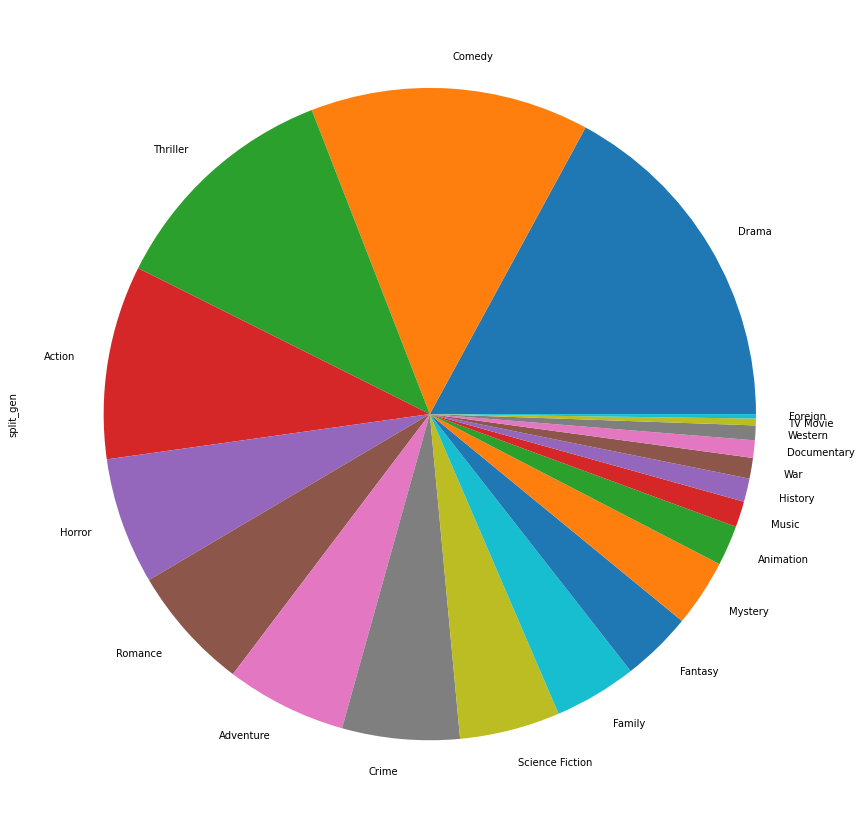

In [160]:
# view with a pie chart
df_genre['split_gen'].value_counts().plot(kind='pie', figsize=(15,15));

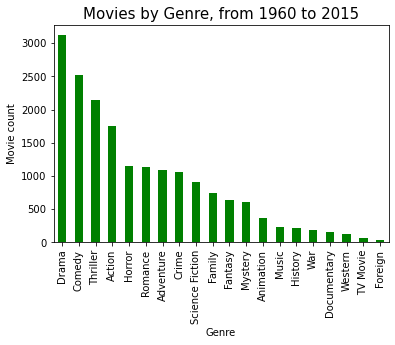

In [166]:
df_genre['split_gen'].value_counts().plot(kind='bar', color='g');
plt.title('Movies by Genre, from 1960 to 2015', size=15)
plt.xlabel('Genre', size=10)
plt.ylabel('Movie count', size=10);

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)


**General scatter plots of
revenue vs budget, profit, and popularity.**


In [133]:
#visualisation
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7030.000000,7030.000000,7.030000e+03,7.030000e+03,7030.000000,7030.000000,7030.000000,7030.000000,7.030000e+03,7.030000e+03
mean,51923.701422,0.829578,2.084592e+07,5.933303e+07,104.849075,312.752205,6.013329,1999.380939,2.501234e+07,7.645232e+07
std,81410.657714,1.180330,3.602527e+07,1.404243e+08,23.794219,693.268737,0.876545,13.469048,3.953679e+07,1.730569e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9540.250000,0.278587,0.000000e+00,0.000000e+00,92.000000,24.000000,5.500000,1992.000000,0.000000e+00,0.000000e+00
50%,14738.500000,0.506241,5.000000e+06,4.859580e+06,101.000000,73.000000,6.100000,2003.000000,6.951084e+06,6.457481e+06
75%,46964.750000,0.956461,2.600000e+07,5.473358e+07,114.000000,263.000000,6.600000,2010.000000,3.463336e+07,7.528359e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


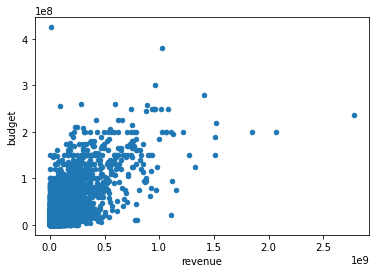

In [145]:
df.plot(x='revenue', y='budget', kind='scatter');

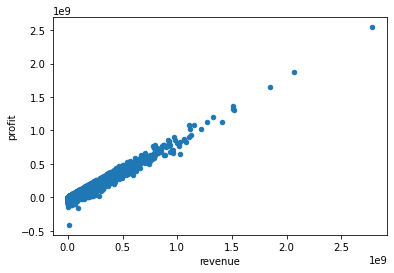

In [148]:
df.plot(x='revenue', y='profit', kind='scatter');

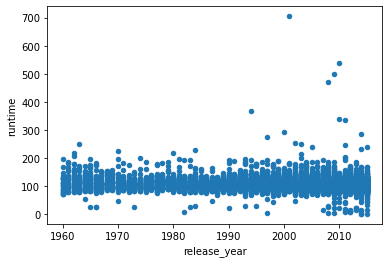

In [149]:
df.plot(x='release_year', y='runtime', kind='scatter');

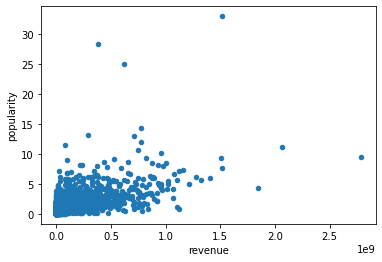

In [151]:
df.plot(x='revenue', y='popularity', kind='scatter');

Revenue and budget have a weak positive correlation.

Revenue and profit have a strong positive correlation.

Revenue and popularity have positive correlation, 
movies with higher revenues is more likely to
be more popular

### Research Question 3  (Which year has the highest release of movies)

In [132]:
#i use here groupby so i can count every released movie in every year and put them in plot
counts = df.groupby('release_year').count()['id']
counts

release_year
1960     28
1961     26
1962     28
1963     29
1964     39
1965     28
1966     39
1967     30
1968     33
1969     19
1970     32
1971     46
1972     33
1973     50
1974     37
1975     33
1976     38
1977     47
1978     52
1979     51
1980     64
1981     66
1982     67
1983     67
1984     86
1985     84
1986     95
1987     91
1988    106
1989     98
1990    102
1991     91
1992    109
1993    139
1994    131
1995    135
1996    160
1997    147
1998    155
1999    159
2000    159
2001    167
2002    192
2003    173
2004    197
2005    232
2006    260
2007    264
2008    269
2009    305
2010    279
2011    306
2012    286
2013    346
2014    384
2015    341
Name: id, dtype: int64

In [162]:
# so i can find the median number of movies i use median()
counts.median()

93.0

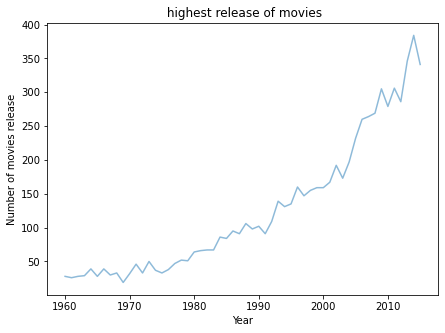

In [128]:
counts.plot(figsize=(7,5),alpha=0.5);
plt.title(' highest release of movies')
plt.xlabel('Year')
plt.ylabel('Number of movies release');

In [167]:
#Saving all the work in the same csv file
df.to_csv('tmdb-movies1.csv', index=False)

<a id='conclusions'></a>
## Conclusions

> i tried to answer quite a few questions using TMDb data and i find:
Which genres are most popular from year to year?
Action, Thriller Comedy and Drama are the most popular genres from all movies from 1960 to 2015
and they are presenting 50% of the total movies genres.
and foreign, western and documentary genres are the last 3 genres.

>Revenue and budget have a weak positive correlation.
Revenue and profit have a strong positive correlation.
Revenue and popularity have positive correlation, 
movies with higher revenues is more likely to
be more popular

>the highest number of movies release in single year is 384 in 2014
and the lowest number is 19 in 1969
, The median number for releasing movies in 1 year is 93 movies.

## Limitations
 >In the End this dataset i have faced a lot of issues, for example: the column home_page, most of the movies doesn't have a home page website there's only about 2k of 10k. and after removing it i find that there's about 5500 rows are null so i fill the numeric rows with fillna() and i also dropped the  String(Object) rows because all of them will affected my analysis.
After that i also dropped the duplicated rows, So i can move forward to the visualisation. 
 
 

